Assignment:

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- Load the housing prices data from Thinkful's database.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse,rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Connect to the data base:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format( postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

In [3]:
# Look at the dataset:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
# Convert categorical columns to numeric by using dummies:
categorical = df.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
df = df.drop(categorical, axis=1)
df = pd.concat([df,dummies], axis=1)

In [5]:
# Y is the target variable:
Y = df['saleprice']
# X is the feature set:
X = df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'exterqual_TA', 'kitchenqual_TA']]

- Split your data into train and test sets.

In [6]:
# Split dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


- Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [7]:
X_train.head()

,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,exterqual_TA,kitchenqual_TA
151,5,969,2,440,969,1,1
262,8,2574,3,868,1482,0,0
1037,8,2263,2,905,1055,0,0
1183,5,1130,2,720,1120,1,1
933,7,1500,2,570,1500,0,0


In [8]:
# We need to manually add a constant in statsmodels' sm
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     540.4
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:37:49   Log-Likelihood:                -13979.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1160   BIC:                         2.801e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.367e+04   8294.165     -7.

In this model:

- F_test is 540.4 and p_value is 0
- R-square is 0.77 and Adjust R-squared is 0.76
- AIC is 27970 and BIC is 28010

According to the R-squared and Adjust R-squared almost 24% of the variance in the target variable is unexplained by explanatory variable in the model. So, there is a room for improvement.

- Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

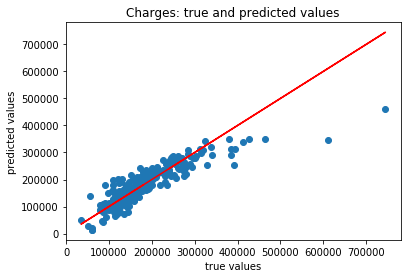

Mean absolute error of the prediction is: 25427.91243226192
Mean squared error of the prediction is: 1514301879.3381054
Root mean squared error of the prediction is: 38914.03190801623
Mean absolute percentage error of the prediction is: 15.340718552575808


In [9]:
# We add constant to the model as it's a best practice to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



- Is the performance of your model satisfactory? Why?

Although these are different metrics, they are essentially using the difference between what we know to be correct saleprice house and predicted one from the model. So, lower values are desirable for all four metrics. The lower the value, the better the performance of the model. So because values for all four metrics are fairly high, the performance of model is not satifactory. 

- Try to improve your model in terms of predictive performance by adding or removing some variables.

- In order to improve the goodness of fit of your model, I add totalsf and yearbuilt variables and remove garagearea and exterqual_TA.

In [14]:
# Now we build a simple linear regression model and estimate it using OLS:

# Y is the target variable:
Y = df['saleprice']
# X is the feature set:
df['totalsf'] = df['totalbsmtsf'] + df['firstflrsf'] + df['secondflrsf']

X = df[['overallqual', 'grlivarea', 'garagecars', 'totalsf', 'yearbuilt', 'kitchenqual_TA']]


In [15]:
# Split dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [16]:
# We need to manually add a constant in statsmodels' sm
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     641.7
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:39:24   Log-Likelihood:                -13972.
No. Observations:                1168   AIC:                         2.796e+04
Df Residuals:                    1161   BIC:                         2.799e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.255e+05   9.78e+04     -5.

In this model:

F_test is 641.7 and p_value is 0 and compare to the first model (F_test is ) is improved. Because the model with higher F statistic is superior to the other one.

R-square and Adjust R-squared both are around 0.77. So, almost 33% of the variance in the target variable is unexplained by explanatory variable in the model. So, compare to the first model, this model is not improved.

AIC is 27960 and BIC is 27990. Comparing with first model, AIC and BIC both are less then first model. So,this model is better than the first model.

So according to above, this model has a better goodness of fit than the first model.

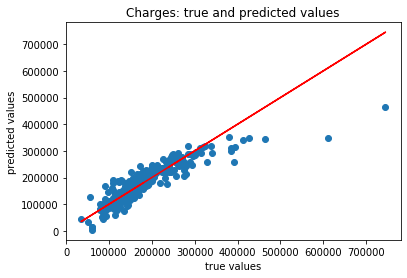

Mean absolute error of the prediction is: 24386.251597625356
Mean squared error of the prediction is: 1434620288.215992
Root mean squared error of the prediction is: 37876.38166741897
Mean absolute percentage error of the prediction is: 14.529724299837287


In [13]:
# We add constant to the model as it's a best practice to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



The test set performance of the second model is better than the previous one with all of the four metrics. Compared to the previous model, this second model seems to better predicts low values because the points are more tightly clustered around the red line.